(sec:selectofhyperp)=
# Selection of Hyperparameters

In {ref}```sec:impactofhyperp```, we have seen that the choice of the hyperparameters $\theta$ impacts the behavior of the Gaussian process regression model. Therefore, the question arises how the hyperparameters should be selected appropriately. In this context, the term "model fitting" is also used. Nevertheless, this approach is fundamentally different from fitting e.g. in case of linear/polynomial regression models or neural networks. These models try to minimize some loss function which calculates the error between the actual labels of the training data and the model predictions. In contrast, the Gaussian process regression model (without noise) has no such prediction error, since it is conditioned to fit the training samples. The selection of hyperparameters determines only how the regression model passes the training samples (refer to the previous animation).

In {eq}`level1` we have seen how the distribution of $f(X^*)$ is computed given $X$ and $y$. This procedure is also called level 1 inference. By incorporating the dependence of the distribution on $\theta$ the equation has the form

$$
p(y^*~|~X^*, X, y, \theta) = \frac{p(y, y^*~|~X^*, X, \theta)}{p(y~|~X, \theta)},
$$ (level1b)

From the Bayesian point of view, a natural approach would be to choose a prior distribution on the hyperparameters $\theta$ and to compute the posterior distribution of $\theta$ in use of Bayesian inference:

$$
\begin{align}
p(\theta~|~X, y) &= \frac{p(y~|~X, \theta)~p(\theta~|~X)}{p(y~|~X)} \\
&= \frac{p(y~|~X, \theta)~p(\theta)}{\int p(y~|~X, \theta)~p(\theta) ~d\theta}
\end{align}$$ (level2)

Please note that the marginal likelihood $p(y~|~X, \theta)$ from {eq}`level1b` plays the role of the likelihood in the level 2 inference in {eq}`level2`.

Then, the posterior predictive distribution reads

$$p(y^*~|~X^*, X, y) = \int p(y^*~|~X^*, X, y, \theta) ~ p(\theta~|~X, y)~d\theta.$$

In particular, the expected values of $y*$ is given by

$$
\begin{align}
\mathbb{E}(y^*) &= \int y^* \int p(y^*~|~X^*, X, y, \theta) ~ p(\theta~|~X, y)~d\theta ~dy^* \\
&= \int \int y^* p(y^*~|~X^*, X, y, \theta) ~dy^*~ p(\theta~|~X, y)~d\theta \\
&= \int K_{\theta}(X^*, X) K_{\theta}(X, X)^{-1} y ~ p(\theta~|~X, y)~d\theta,
\end{align}
$$

where $K_{\theta}$ illustrates the dependence of the kernel $k$ and hence, of $K$ on $\theta$.

However, the marginal likelihood $p(y~|~X) = \int p(y~|~X, \theta)~p(\theta) ~d\theta$ usually requires approximations, since it can not be computed analytically. This can for example be done in use of [MCMC methods](https://gpflow.readthedocs.io/en/master/notebooks/advanced/mcmc.html).

In most cases, the **MLE or sometimes a MAP estimate for $\theta$ is used** to obtain a predictive Gaussian process model. More precisely, a prior distribution for $\theta$ is chosen and the estimate is given by

$$\begin{align}
  \hat{\theta} &= \underset{\theta}{\text{argmax}}~ p(y~|~X, \theta)~p(\theta) \\
               &= \underset{\theta}{\text{argmax}}~ \ln \big(p(y~|~X, \theta)\big) + \ln \big(p(\theta)\big) \\
               &= \underset{\theta}{\text{argmax}}~ \ln \big(p(y~|~X, \theta)\big) + \ln \big(p(\theta)\big) \\
               &= \underset{\theta}{\text{argmax}}~ \mathcal{L}(\theta~|~X, y) + \ln \big(p(\theta)\big),
  \end{align}$$
               
where 

$$\begin{align}
\mathcal{L}(\theta~|~X, y) &= \ln \Big( \frac{1}{\sqrt{(2\pi)^d |K_{\theta}(X, X)|}} ~\exp\Big(-\frac{1}{2}~y^T K_{\theta}(X, X)^{-1}y\Big)\Big)\\
&= - \frac{d}{2} \ln \big(2 \pi \big) - \ln \big(|K_{\theta}(X, X)| \big) - \frac{1}{2} y^T K_{\theta}(X, X)^{-1}y
\end{align}$$

denotes the so-called **log marginal likelihood**. MLE implies that $p(\theta)$ is independent of $\theta$ and therefore, the MLE estimate is given by

$$\hat{\theta} = \underset{\theta}{\text{argmax}}~ \mathcal{L}(\theta~|~X, y)$$

The term $- \frac{1}{2} y^T K_{\theta}(X, X)^{-1}y$ is called **data-fit** and $\ln \big(|K_{\theta}(X, X)| \big)$ is the **complexity penalty**. The counterplay of these two terms provides an automatic trade-off which tends to the **least complex model which is able to explain the given data**. This principle is also known as [Occam's razor](https://en.wikipedia.org/wiki/Occam%27s_razor).
               
MLE implies that $p(\theta)$ is independent of $\theta$ and therefore, the MLE estimate is given by

$$\hat{\theta} = \underset{\theta}{\text{argmax}}~ \mathcal{L}(\theta~|~X, y)$$

The log marginal likelihood for the example illustrated in {ref}```sec:impactofhyperp``` in dependence of the length scale $l$ with fixed values $\sigma_{\text{noise}}^2 = 0$ and $\sigma^2 = 1$ is given as follows:

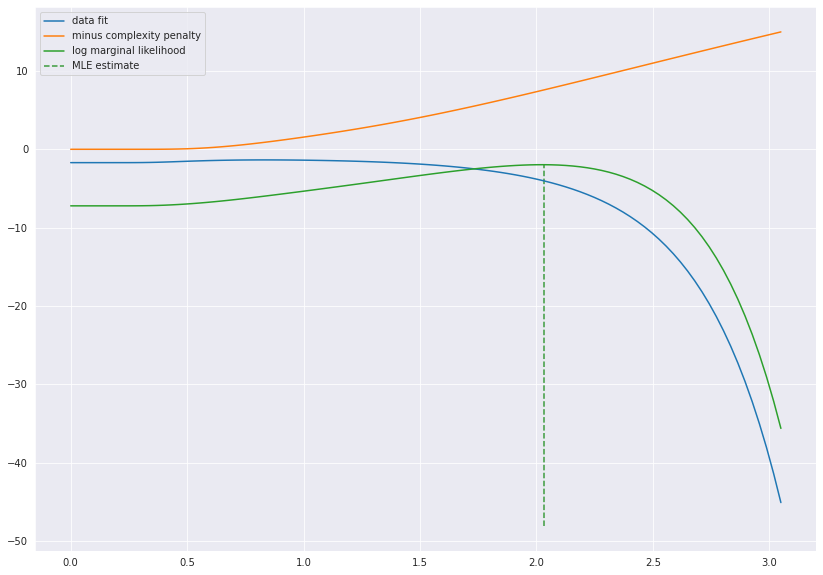

The MLE estimate for l is 2.03


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import ConstantKernel
from sklearn.gaussian_process.kernels import WhiteKernel

# sample training data
X = np.array([1.01, 3.51, 4.51, 7.01, 7.91, 9.01]).reshape(-1, 1)
Y = np.sin(X)
nb_steps = 500
delta_t = 10 / nb_steps
t = np.arange(0, 10, delta_t)

def log_marginal_likelihood(l):
    kernel = ConstantKernel(constant_value=1.) * RBF(length_scale=l) + WhiteKernel(noise_level=0.)
    K = kernel(X, X)
    datafit = - np.matmul(Y.reshape(1, -1), np.linalg.solve(K, Y.reshape(-1, 1)))/2
    complexity = - np.log(np.linalg.det(K))
    lml = - X.shape[0]/2 * np.log(2*np.pi) + datafit + complexity
    return datafit[0], complexity, lml[0]
                        
length_scales = np.linspace(1e-5, 3.05, num=100)
datafits, complexities, lmls = [], [], []
for l in length_scales:
    datafit, complexity, lml = log_marginal_likelihood(l)
    datafits.append(datafit)
    complexities.append(complexity)
    lmls.append(lml)
                          
fig= plt.figure(figsize=(14, 10))
plt.plot(length_scales, datafits, label='data fit')
plt.plot(length_scales, complexities, label='minus complexity penalty')
plt.plot(length_scales, lmls, label='log marginal likelihood')
plt.vlines(length_scales[np.argmax(lmls)], plt.ylim()[0], np.max(lmls), colors='green', alpha=0.75, 
           linestyles='dashed', label='MLE estimate')
plt.legend()
plt.show()
print('The MLE estimate for l is {:.2f}'.format(length_scales[np.argmax(lmls)]))                        

This result can be visualized in use of the interactive animation in {ref}```sec:impactofhyperp```.